Другий рівень (ускладнений)

In [53]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder

In [54]:
pd_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
pd_df.fillna(pd_df.mean(numeric_only=True).astype(int), inplace=True)

display(pd_df.head(20))
# pd_df['date'] = pd.to_datetime(pd_df['date'], format="%m/%d/%Y")
# pd_df['wip'] = pd_df['wip'].astype('int64')

pd_df['age'] = pd_df['age'].astype('int64')
print(pd_df.dtypes)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.0,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [98]:
# num_headers: list = ["smv"]
num_headers: list = ["avg_glucose_level", "bmi"]
def pd_normalize_data(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    for column in columns:
        df[column] = (df[column]-df[column].min())/(df[column].max()-df[column].min())
    return df

def pd_standartize_data(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    for column in columns:
        df[column] = (df[column]-df[column].mean())/df[column].std()
    return df


In [100]:
pd_normalize_copy = pd_df.copy(deep=True)
normalized_df = pd_normalize_data(pd_normalize_copy, num_headers)

In [99]:
pd_standartize_copy = pd_df.copy(deep=True)
standartized_df = pd_standartize_data(pd_standartize_copy, num_headers)

In [ ]:
def pd_draw_normalized(df: pd.DataFrame, normalized_df: pd.DataFrame) -> None:
    sns.set_style("darkgrid")
    fig: plt.Figure
    ax: tuple[plt.Axes, plt.Axes]
    
    fig, ax  = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

    sns.lineplot(data=df.iloc[1000:2000], x='avg_glucose_level', y='bmi', ax=ax[0], color='red')
    ax[0].set_title("Initial dataframe")

    sns.lineplot(data=normalized_df.iloc[1000:2000], x='avg_glucose_level', y='bmi', ax=ax[1])
    ax[1].set_title("Normalized dataframe")

    ax[0].grid(True)
    ax[1].grid(True)
    plt.tight_layout()
    plt.show()

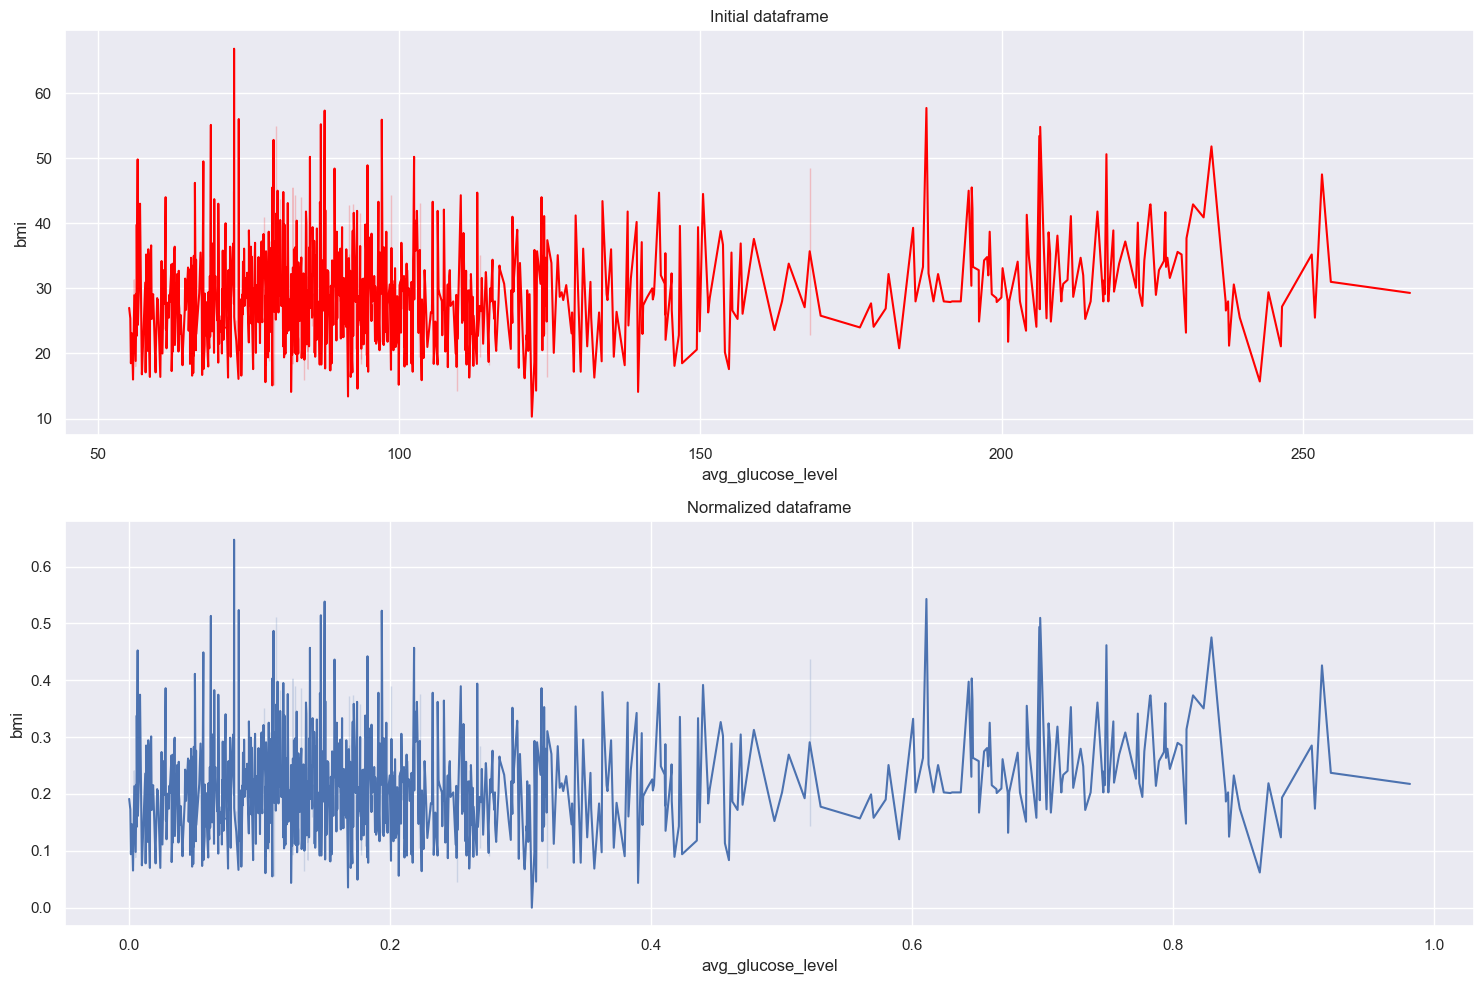

In [95]:
pd_draw_normalized(pd_df, normalized_df)

In [ ]:
def pd_draw_standartized(df: pd.DataFrame, standartized_df: pd.DataFrame)-> None:
    sns.set_style("darkgrid")
    fig: plt.Figure
    ax: tuple[plt.Axes, plt.Axes]

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

    sns.lineplot(data=pd_df.iloc[1000:1700], x='avg_glucose_level', y='bmi', ax=ax[0], color='red')
    ax[0].set_title("Initial dataframe")

    sns.lineplot(data=standartized_df.iloc[1000:1700], x='avg_glucose_level', y='bmi', ax=ax[1])
    ax[1].set_title("Standartized dataframe")

    ax[0].grid(True)
    ax[1].grid(True)
    plt.tight_layout()
    plt.show()

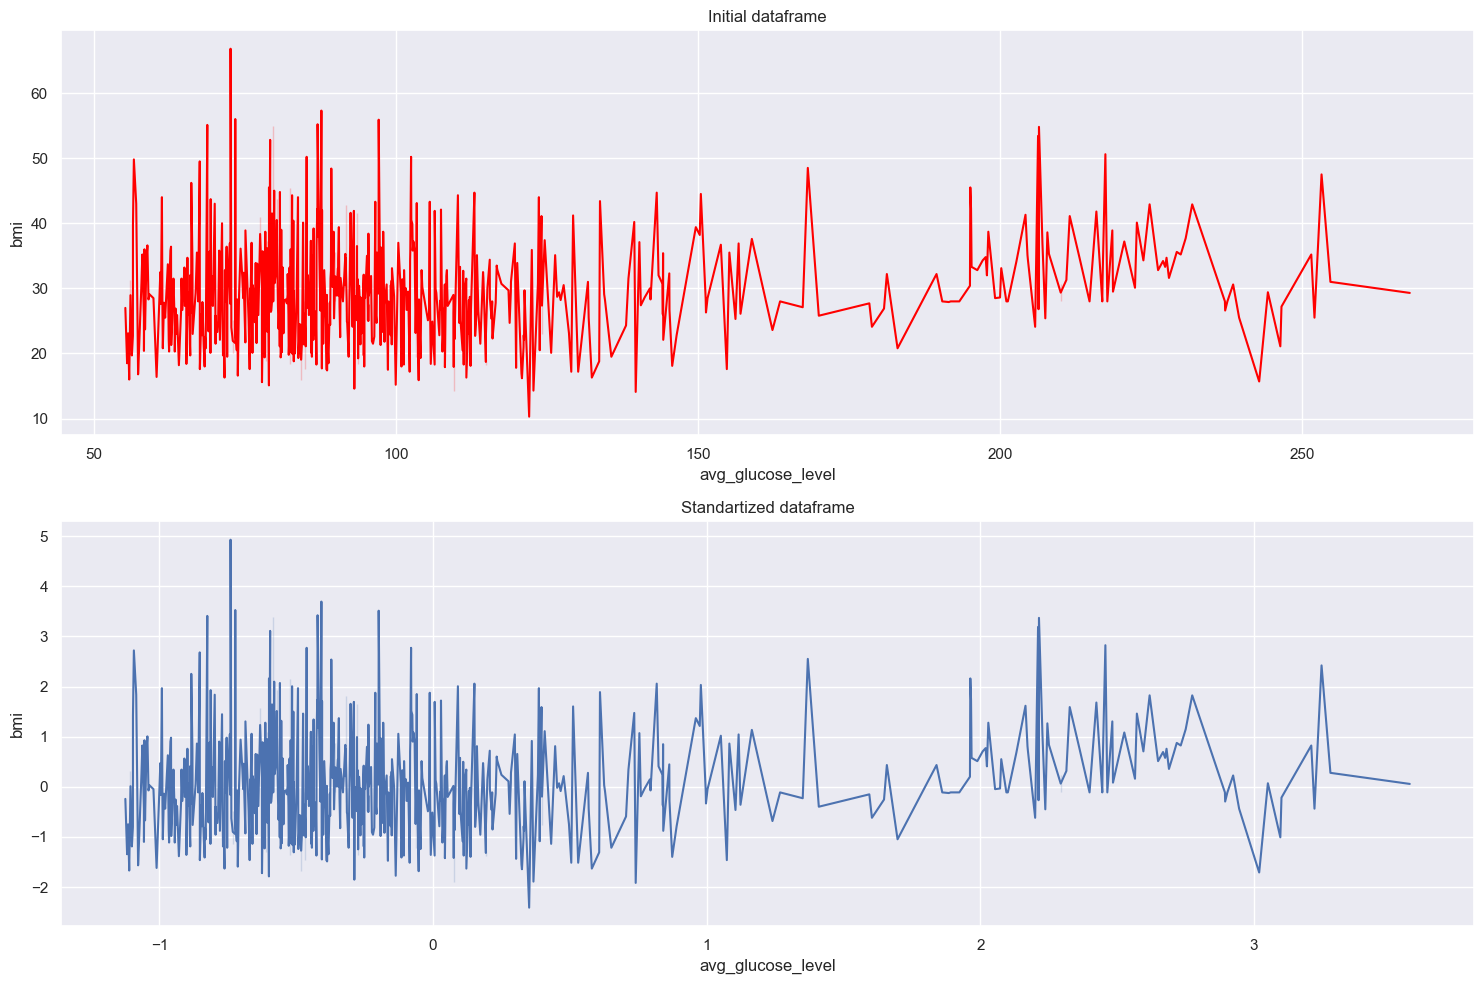

In [101]:
pd_draw_standartized(pd_df, standartized_df)

In [222]:
def pd_draw_histplot(df: pd.DataFrame) -> None:
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")
    palette = {
    'formerly smoked': "#FF6347",
    'never smoked': "#1E90FF",
    'smokes': "#32CD32",
    'Unknown': "#fff33b"
}
    sns.histplot(data=df, x='avg_glucose_level', 
             bins=10,
             palette=palette, alpha=0.8, kde=True, multiple='stack',
            linewidth=1, hue='smoking_status', edgecolor='violet')

    plt.title("Histogram: average glucose level")
    plt.xlabel("avg_glucose_level")
    plt.ylabel("Number of entries")
    plt.grid(True)
    plt.show()

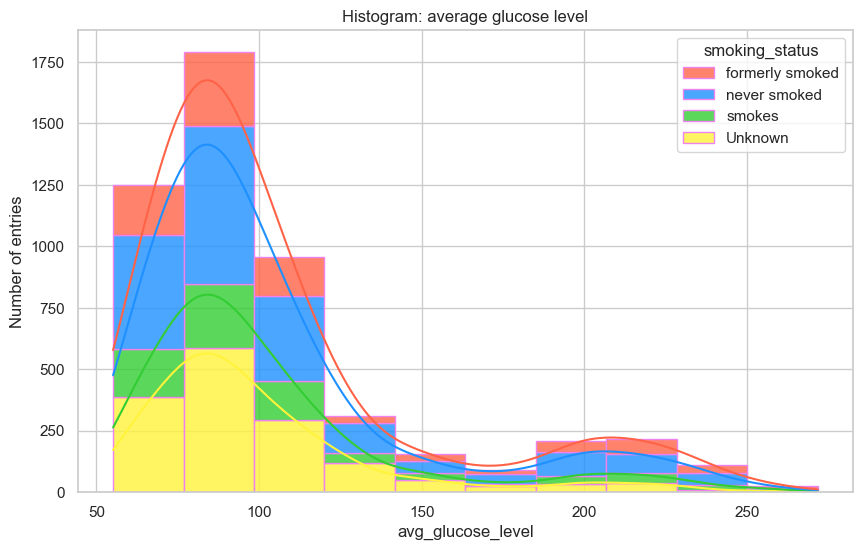

In [223]:
pd_draw_histplot(pd_df)

Pearson and Spearman coefficients

In [116]:
def calculate_coeff(x: pd.DataFrame | np.ndarray, y: pd.DataFrame | np.ndarray) -> None:
    pearson_corr, pearson_pval = pearsonr(x, y)
    spearman_corr, spearman_pval = spearmanr(x, y)
    print(f"Pearson coefficient: {pearson_corr:.4f}, p-value: {pearson_pval:.4g}")
    print(f"Spearmen coefficient: {spearman_corr:.4f}, p-value: {spearman_pval:.4g}")


In [117]:
calculate_coeff(pd_df["bmi"], pd_df["avg_glucose_level"])

Pearson coefficient: 0.1666, p-value: 3.877e-33
Spearmen coefficient: 0.1116, p-value: 1.272e-15


In [ ]:
def one_hot_encode(pd_df: pd.DataFrame, categorical_headers: list, encoder: OneHotEncoder) -> pd.DataFrame:
    categorical_df = pd_df[categorical_headers]
    encoded_array = encoder.fit_transform(categorical_df).toarray()
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_headers))
    general_df = pd.concat([pd_df.drop(columns=categorical_headers).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    return general_df

In [119]:
categorical_headers: list = ["gender", "smoking_status", "ever_married", "work_type", "Residence_type"]
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_df = one_hot_encode(pd_df, categorical_headers, encoder)
display(encoded_df.head(20))

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,smoking_status_smokes,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,9046,67,0,1,228.69,36.6,1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,51676,61,0,0,202.21,28.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,31112,80,0,1,105.92,32.5,1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,60182,49,0,0,171.23,34.4,1,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79,1,0,174.12,24.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,56669,81,0,0,186.21,29.0,1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,53882,74,1,1,70.09,27.4,1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,10434,69,0,0,94.39,22.8,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,27419,59,0,0,76.15,28.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,60491,78,0,0,58.57,24.2,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [123]:
def draw_heatmap(df: pd.DataFrame) -> None:
    plt.figure(figsize=(20, 15))
    sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=0.7)
    plt.title('Correlational matrix')
    plt.show()

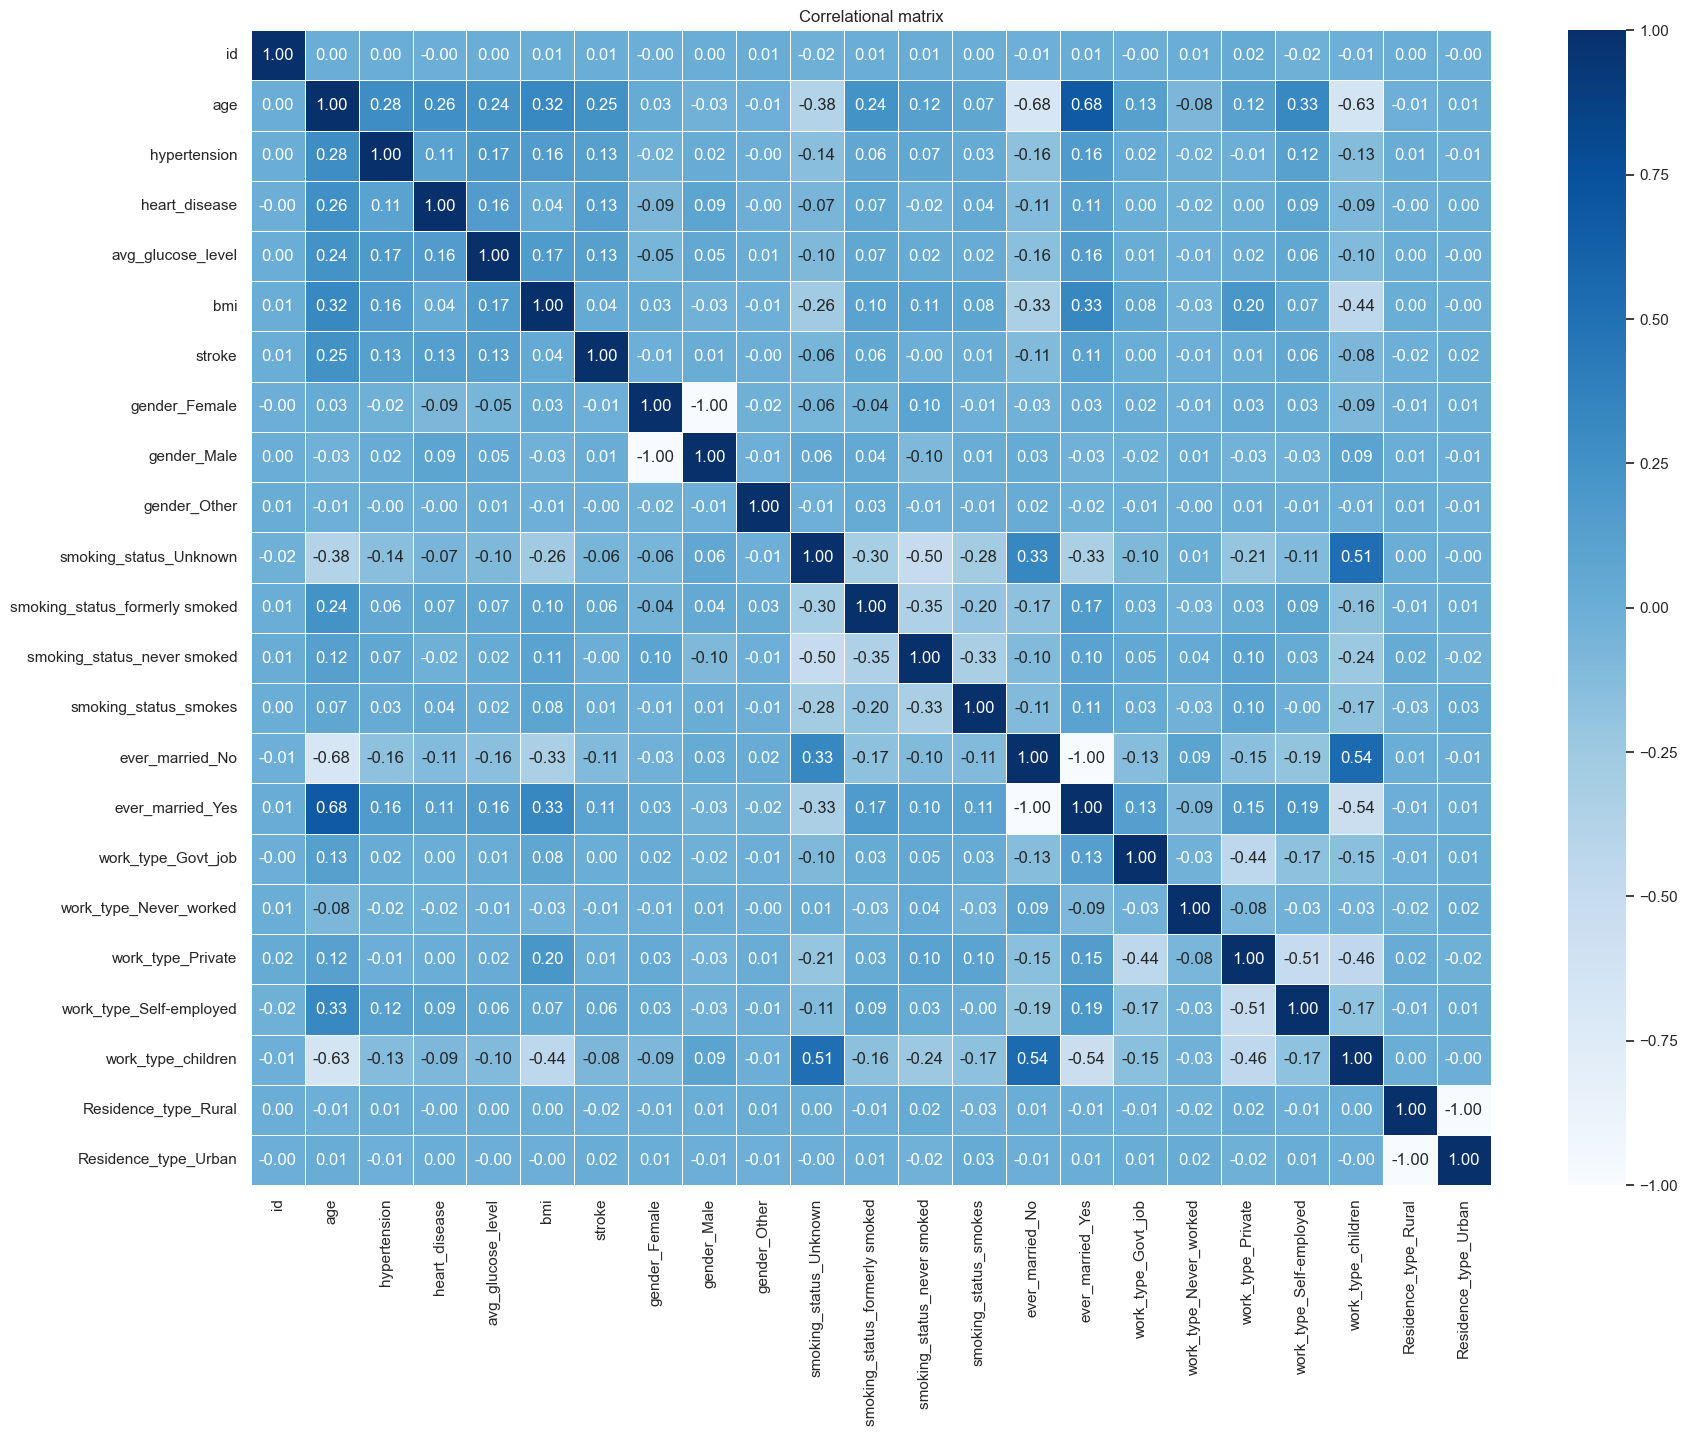

In [124]:
draw_heatmap(encoded_df)

In [218]:
def draw_pairplot(df: pd.DataFrame) -> None:
    numeric_df = df[["avg_glucose_level", "bmi"]]
    g = sns.pairplot(numeric_df, height=3, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde")
    
    g.axes.flatten()[0].set_xticks(np.arange(0, 300, 50))
    g.axes.flatten()[0].set_yticks(np.arange(0, 250, 50))
    g.axes.flatten()[1].set_xticks(np.arange(0, 100, 10))
    for ax in g.axes.flatten():
        ax.grid(True)
    plt.suptitle("Pairplot of Numerical Features", y=1.02)
    plt.show()

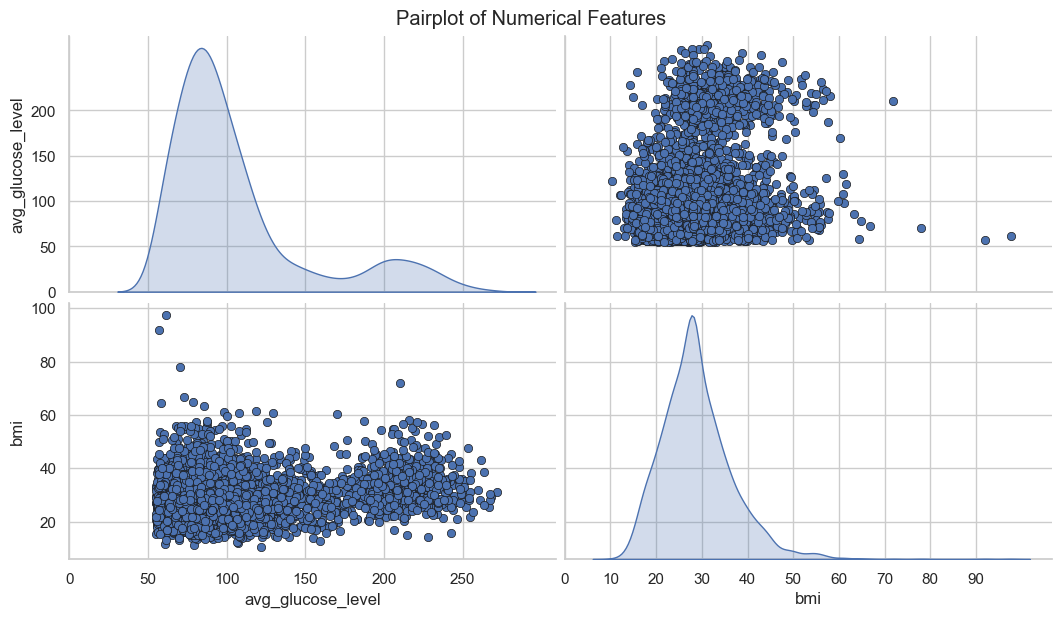

In [219]:
draw_pairplot(pd_df)